## POSTTEST 7 - CONVOLUTIONAL NEURAL NETWORK
#### dataset : https://www.kaggle.com/datasets/anshtanwar/jellyfish-types/

**Import Library**

In [32]:
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator

<i>mengambil alamat dimana dataset citra "Jellyfish" disimpan</i>

In [33]:
img_path = r'C:\Users\ASUS\Downloads\Posttest_KB_7\Jellyfish'

<i>jumlah label</i>

In [34]:
os.listdir(img_path)

['barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish',
 'Moon_jellyfish']

**ImageDataGenerator untuk memuat serta melakukan augmentasi pada data**
<i>
1. rescale=1./255 mengubah intesitas pixel citra menjadi antara 0 hingga 1. 
2. validation_split=0.3 membagi dataset menjadi dua bagian: 70% untuk train dan 30% untuk val
</i>

In [35]:
img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

**Split Dataset (train, val, test)**

In [36]:
train_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150,150), # ukuran citra diubah menjadi 150x150 pixel
    batch_size=32, # membagi citra ke dalam batch 32
    class_mode='categorical', # lebih dari dua
    subset='training'
)

validation_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical'
)

Found 630 images belonging to 6 classes.
Found 270 images belonging to 6 classes.
Found 900 images belonging to 6 classes.


**Sequential Model**

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)), # convolutional (input)
    tf.keras.layers.MaxPool2D((2,2)), # pooling

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # convolutional
    tf.keras.layers.MaxPool2D((2,2)), 

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # convolutional
    tf.keras.layers.MaxPool2D((2,2)), 

    tf.keras.layers.Flatten(), # mengubah citra dari matriks menjadi vektor
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax') # output, jumlah kelas 6
])

**Fungsi Callback**

In [38]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=10)

**Compile Model**

In [39]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Fit Model**

In [40]:
hasil = model.fit(train_generator,
                  validation_data=validation_generator,
                  epochs=10, 
                  callbacks=[callback])

Epoch 1/10


20/20 [==============================] - 6s 280ms/step - loss: 1.7593 - accuracy: 0.2556 - val_loss: 1.5555 - val_accuracy: 0.3111
Epoch 2/10
20/20 [==============================] - 5s 255ms/step - loss: 1.4100 - accuracy: 0.4349 - val_loss: 1.2509 - val_accuracy: 0.4704
Epoch 3/10
20/20 [==============================] - 5s 248ms/step - loss: 1.1714 - accuracy: 0.5524 - val_loss: 1.1019 - val_accuracy: 0.5593
Epoch 4/10
20/20 [==============================] - 5s 247ms/step - loss: 1.0039 - accuracy: 0.5952 - val_loss: 1.0074 - val_accuracy: 0.5889
Epoch 5/10
20/20 [==============================] - 5s 252ms/step - loss: 0.7859 - accuracy: 0.7048 - val_loss: 0.8646 - val_accuracy: 0.6778
Epoch 6/10
20/20 [==============================] - 5s 250ms/step - loss: 0.5842 - accuracy: 0.7841 - val_loss: 0.9088 - val_accuracy: 0.6741
Epoch 7/10
20/20 [==============================] - 5s 250ms/step - loss: 0.4540 - accuracy: 0.8397 - val_loss: 0.9196 - val_accuracy: 0.6741
Epoch 8/10
20/20 

**Evaluasi Model**
<i>
1. loss artinya rata-rata kesalahan prediksi model sekitar 0.408 (kinerja model baik)
2. accuracy artinya model memiliki akurasi sekitar 90.66% (tingkat akurasi yang baik)
</i>

In [41]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss:", loss)
print("Accuracy:", accuracy)

29/29 [==============================] - 2s 62ms/step - loss: 0.4088 - accuracy: 0.9067
Loss: 0.40877532958984375
Accuracy: 0.9066666960716248


**Grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation**

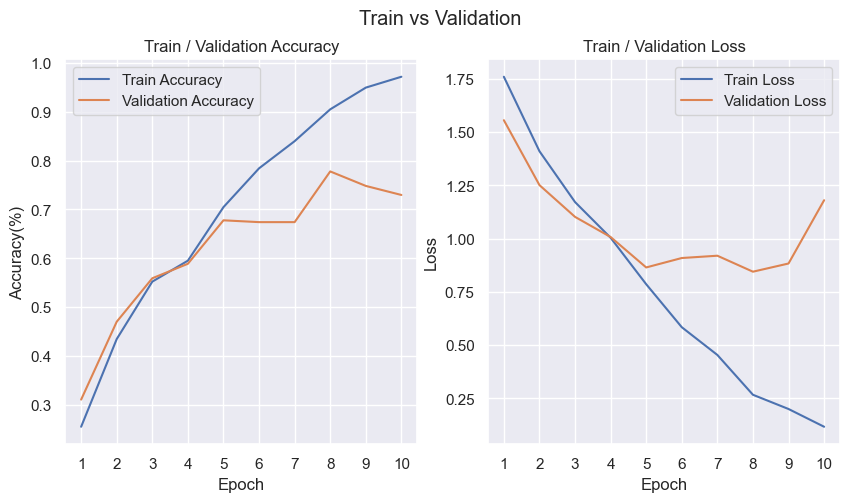

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

epoch = [i+1 for i in range(10)]

sns.set_theme()
plt.figure(figsize=(10,5))
plt.suptitle('Train vs Validation')

# akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch, y=hasil.history['accuracy'], label = 'Train Accuracy')
sns.lineplot(x=epoch, y=hasil.history['val_accuracy'], label = 'Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('Epoch')
plt.title('Train / Validation Accuracy')

# loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch, y=hasil.history['loss'], label = 'Train Loss')
sns.lineplot(x=epoch, y=hasil.history['val_loss'], label = 'Validation Loss')

plt.xticks(epoch)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Train / Validation Loss')

plt.show()